# PyTorch Workflow

We will be going through each step from getting the data into numbers, number representation, trainig and deploy. End-to-end workflow!


In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural network achitecture
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (Preparing and Loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To shorcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


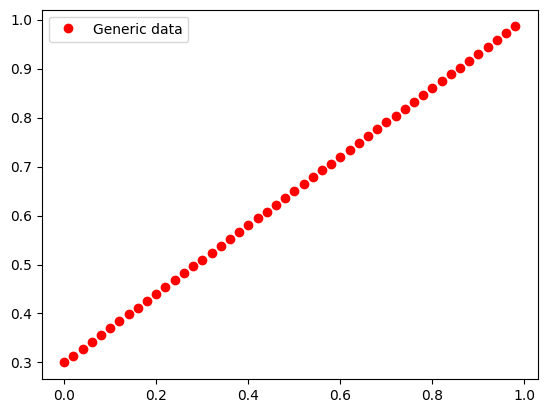

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
# Capital X is notation for tensors, while lowercase y is notation for the dependant variable
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # Linear Regression formula

# Print the first 10 values of X (inputs) and y (outputs)
print(X[:10], y[:10])

# Plot data
plt.plot(X.numpy(), y.numpy(), 'ro', label='Generic data')
plt.legend()
plt.show()

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning data)

Analogy:

Course materials -> Practice exam -> Final exam

Training set -> Validation set -> Test set

Model learns paterns -> Model tunes patterns -> See if the model is ready for Generalization

60-80% -> 10-20% -> 10-20%

Let's create a training set with out data

In [ ]:
# Create a train/test split (a method for our simple data)
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize or data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [ ]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Check the documentation for the scatter function if there are any doubts
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', label='Training data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', label='Testing data')

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c = 'r', label='Predictions')

  # Show the legend
  plt.legend(prop={'size': 14})

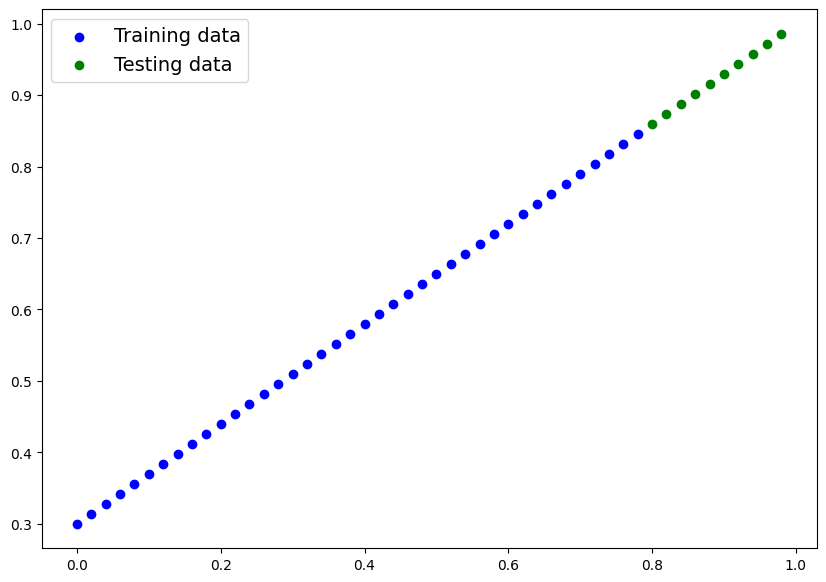

In [ ]:
plot_predictions()

## 2. Build model

Our first PyTorch model! This is very exciting... I hope you have some experience with OOP, though

What our model class does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [ ]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.module
  # You can stack modules to create progressively more complex models

  # Constructor
  def __init__(self):
    super().__init__()
    # Parameter is a subclass of Tensor that gets automatically added to the list of a Module parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
      return self.weights * x + self.bias # This is for the linear regression formula

In [ ]:
from peft import LoraConfig

# Target modules - either specific ones or all linear layers
target_modules = ['q_proj', 'k_proj', 'v_proj', 'o_proj']

lora_config = LoraConfig(
    r=16,  # Rank of the low rank matrices
    target_modules=target_modules,
    lora_alpha=8,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)